<a href="https://colab.research.google.com/github/Raruu/Machine-Learning-2025/blob/main/JS05/JS05_TG_Hidayat_Widi_Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas



In [1]:
#@markdown ### Helper function
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None, label_names=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))

    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = sorted(list(set(labels)))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        legend_label = None
        if label_names is not None:
            if k >= 0 and k < len(label_names):
                legend_label = label_names[k]
            elif k == -1:
                legend_label = "Noise"

        class_mask = (labels == k)
        if k == -1:
            col = [0, 0, 0, 1]  # Warna hitam untuk noise
            marker = "x"
            sizes = 16
        else:
            marker = "o"
            sizes = (1 + 5 * probabilities[class_mask])**2

        ax.scatter(
            X[class_mask, 0],
            X[class_mask, 1],
            marker=marker,
            facecolor=tuple(col),
            edgecolor="k",
            s=sizes,
            label=legend_label
        )

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"

    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"

    ax.set_title(title)

    if any(ax.get_legend_handles_labels()[1]):
        ax.legend()

    plt.tight_layout()

## 1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).


In [2]:
try:
  import hdbscan
except ImportError:
  !pip install -q hdbscan
  import hdbscan

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


## 2. Lakukan clustering dengan HDBSCAN.

In [3]:
clusterer = hdbscan.HDBSCAN().fit(X)
hdbscan_labels = clusterer.labels_

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## 3. Laporkan hasil:
- Jumlah cluster yang terbentuk.
- Banyaknya noise.
- Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

    

Jumlah cluster terbentuk: 2
Jumlah noise: 0


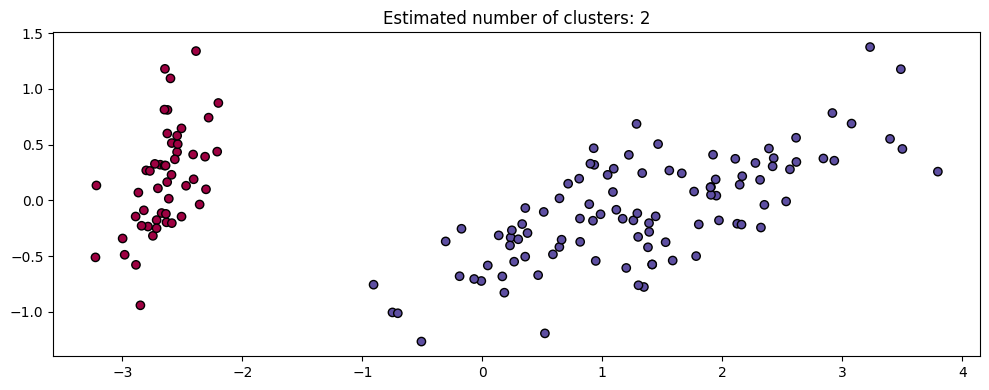

In [4]:
n_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_noise = np.sum(hdbscan_labels == -1)
print("Jumlah cluster terbentuk:", n_clusters)
print("Jumlah noise:", n_noise)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plot(X_pca, hdbscan_labels)

## 4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

Berdasarkan visualisasi:
- HDBSCAN mengidentifikasi 2 kluster, sementara dataset asli memiliki 3 kelas. Hal ini menunjukkan bahwa HDBSCAN tidak sepenuhnya memisahkan semua spesies yang berbeda dalam dataset Iris.
- HDBSCAN secara kasar sesuai dengan spesies `setosa`, yang terpisah dengan baik dalam visualisasi PCA. Kluster HDBSCAN lainnya tampak bergabung dengan spesies `versicolor` dan `virginica`.

#### Kesimpulan:
Hasil klustering HDBSCAN tidak sepenuhnya sesuai dengan label asli dataset `iris`

#### Perbandingan visualisasi:

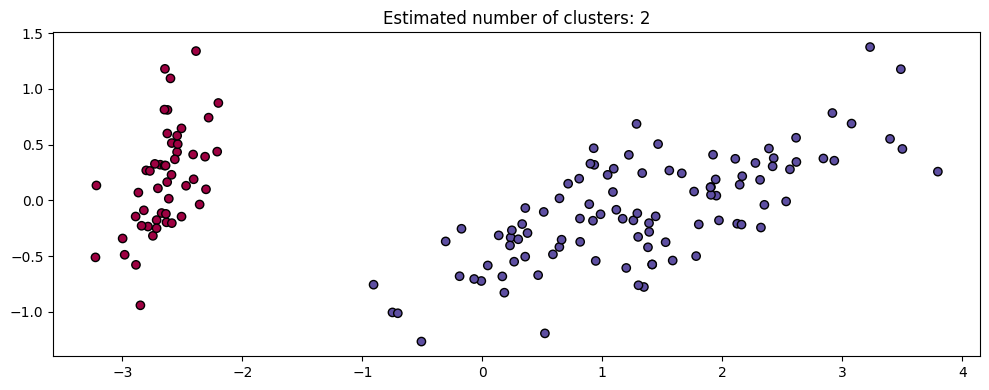

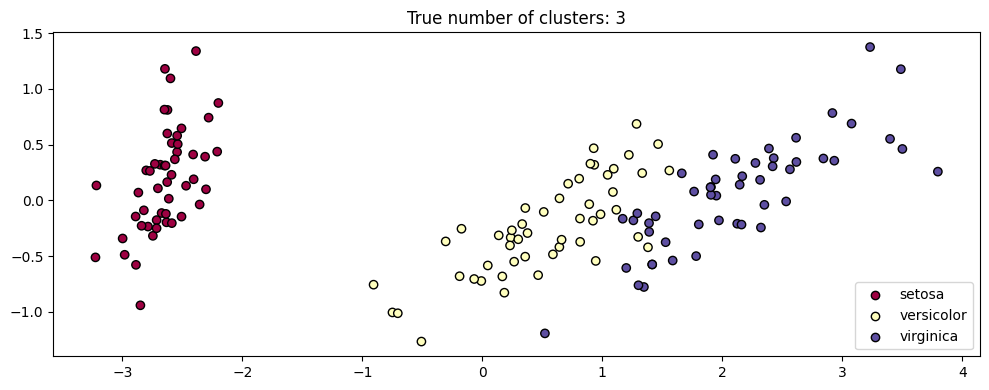

In [5]:
plot(X_pca, hdbscan_labels)
plot(X_pca, iris.target, ground_truth=True, label_names=iris.target_names)